DATA PREPROCESSING FOR CSL2050: COURSE PROJECT

In [71]:
#Importing Necessary Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import wordcloud
import warnings
from nltk.corpus import stopwords
%matplotlib inline
nltk.download('stopwords')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91911\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
#Importing the dataset:
file_path = 'Dataset/data.csv'
df = pd.read_csv(file_path, encoding='Windows-1252')
df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Kmï¿½),Density (P/Kmï¿½)
0,cb774db0d1,"I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...
31010,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554,120340.0,55
31011,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644,1266700.0,19
31012,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589,910770.0,226
31013,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816,120410.0,214


In [73]:
#Basic Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31015 entries, 0 to 31014
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   textID             31015 non-null  object 
 1   text               31014 non-null  object 
 2   sentiment          31015 non-null  object 
 3   Time of Tweet      31015 non-null  object 
 4   Age of User        31015 non-null  object 
 5   Country            31015 non-null  object 
 6   Population -2020   31015 non-null  int64  
 7   Land Area (Kmï¿½)  31015 non-null  float64
 8   Density (P/Kmï¿½)  31015 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 2.1+ MB


In [74]:
#Converting text object which is float by default to string:
df['text'] = df['text'].astype(str)
df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Kmï¿½),Density (P/Kmï¿½)
0,cb774db0d1,"I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...
31010,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554,120340.0,55
31011,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644,1266700.0,19
31012,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589,910770.0,226
31013,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816,120410.0,214


In [75]:
print("Sentiment Analysis Dataset: Features")
print("Continunous features: 'text ID, text, Population, Land Area, Density'")
print("Categorical features with value counts:")
print(df['sentiment'].value_counts())
print(df['Time of Tweet'].value_counts())
print(df['Age of User'].value_counts())
print(df['Country'].value_counts())

Sentiment Analysis Dataset: Features
Continunous features: 'text ID, text, Population, Land Area, Density'
Categorical features with value counts:
neutral     12548
positive     9685
negative     8782
Name: sentiment, dtype: int64
morning    10339
noon       10338
night      10338
Name: Time of Tweet, dtype: int64
0-20      5171
21-30     5170
31-45     5170
46-60     5168
60-70     5168
70-100    5168
Name: Age of User, dtype: int64
Afghanistan        169
Ecuador            169
Chile              169
China              169
Colombia           169
                  ... 
Singapore          144
Slovakia           144
Slovenia           144
Solomon Islands    144
Zimbabwe           144
Name: Country, Length: 195, dtype: int64


In [76]:
column_name_mapping = {
    "Population -2020": "Population",
    "Land Area (Kmï¿½)": "Land Area",
    "Density (P/Kmï¿½)": "Density",
}

# Rename columns using the rename() method
df = df.rename(columns=column_name_mapping)
df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population,Land Area,Density
0,cb774db0d1,"I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...
31010,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554,120340.0,55
31011,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644,1266700.0,19
31012,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589,910770.0,226
31013,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816,120410.0,214


In [77]:
#Categorical Encoding of target variable:
df['sentiment'] = df['sentiment'].replace({'negative': 0, 'neutral': 1, 'positive': 2})
df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population,Land Area,Density
0,cb774db0d1,"I`d have responded, if I were going",1,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,0,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,0,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,0,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",0,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...
31010,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",0,noon,21-30,Nicaragua,6624554,120340.0,55
31011,416863ce47,All alone in this old house again. Thanks for...,2,night,31-45,Niger,24206644,1266700.0,19
31012,6332da480c,I know what you mean. My little dog is sinkin...,0,morning,46-60,Nigeria,206139589,910770.0,226
31013,df1baec676,_sutra what is your next youtube video gonna b...,2,noon,60-70,North Korea,25778816,120410.0,214


<AxesSubplot:xlabel='Density', ylabel='sentiment'>

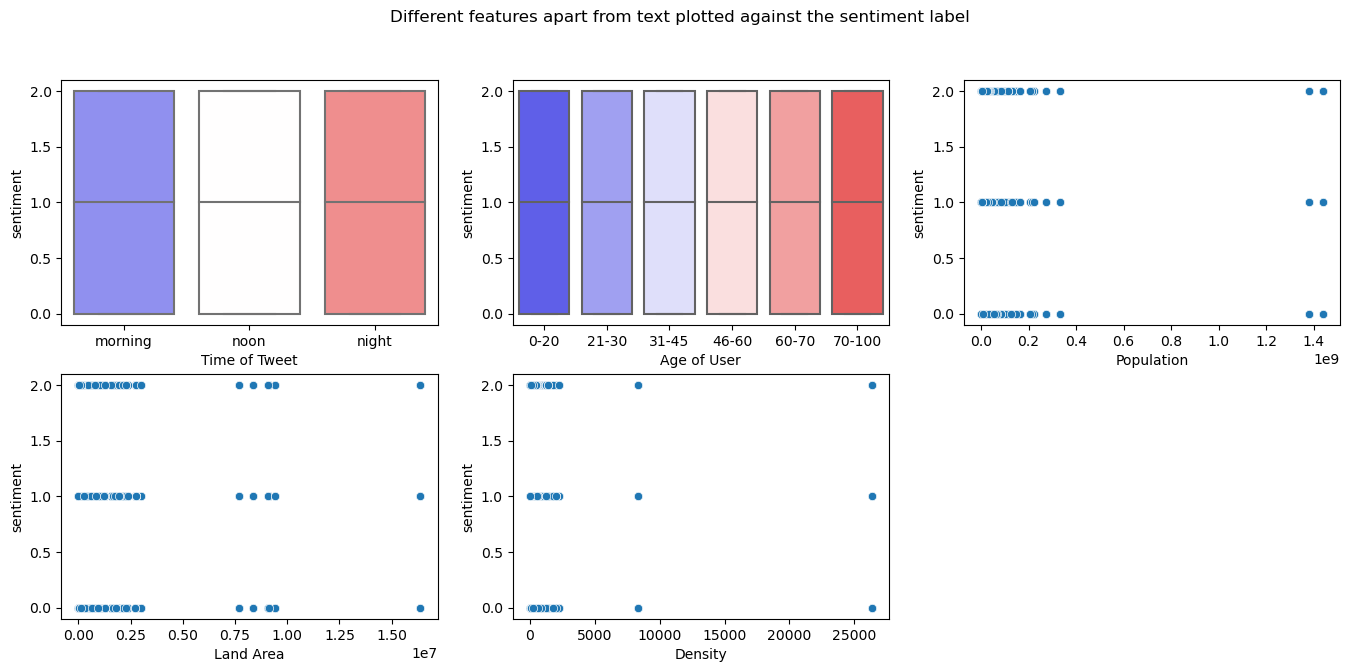

In [78]:
#Visualize target variable against other features:
#check for outliers
figure, axes = plt.subplots(2, 3, figsize = (16.5, 7))
figure.suptitle("Different features apart from text plotted against the sentiment label")
figure.delaxes(axes[1][2])

sns.boxplot(ax = axes[0, 0], data = df, x = "Time of Tweet", y = "sentiment", palette = "bwr")
sns.boxplot(ax = axes[0, 1], data = df, x = "Age of User", y = "sentiment", palette = "bwr")
sns.scatterplot(ax = axes[0, 2], data = df, x = "Population", y = "sentiment", palette = "bwr")
sns.scatterplot(ax = axes[1, 0], data = df, x = "Land Area", y = "sentiment", palette = "bwr")
sns.scatterplot(ax = axes[1, 1], data = df, x = "Density", y = "sentiment", palette = "bwr")

We observe that the dataset is a uniform sampling of the population, with respect to all the features.

From the df.info(), it is clear that the dataset is complete with no null/missing values.

Let's perform tweet text pre-processing first:

In [79]:
# Function to detect patern and remove from text:
def remove_pattern(txt_input, pat):
    r = re.findall(pat, txt_input)
    for word in r:
        txt_input = re.sub(word,"",txt_input)
    return txt_input

In [80]:
# Remove special characters, numbers and other punctuations:
df['processed_text'] = df['text'].str.replace("[^a-zA-Z#]"," ")
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population,Land Area,Density,processed_text
0,cb774db0d1,"I`d have responded, if I were going",1,morning,0-20,Afghanistan,38928346,652860.0,60,I d have responded if I were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,0,noon,21-30,Albania,2877797,27400.0,105,Sooo SAD I will miss you here in San Diego
2,088c60f138,my boss is bullying me...,0,night,31-45,Algeria,43851044,2381740.0,18,my boss is bullying me
3,9642c003ef,what interview! leave me alone,0,morning,46-60,Andorra,77265,470.0,164,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",0,noon,60-70,Angola,32866272,1246700.0,26,Sons of why couldn t they put them on t...


In [81]:
#Converting processed test to lowercase:
df['processed_text'] = df['processed_text'].str.lower()
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population,Land Area,Density,processed_text
0,cb774db0d1,"I`d have responded, if I were going",1,morning,0-20,Afghanistan,38928346,652860.0,60,i d have responded if i were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,0,noon,21-30,Albania,2877797,27400.0,105,sooo sad i will miss you here in san diego
2,088c60f138,my boss is bullying me...,0,night,31-45,Algeria,43851044,2381740.0,18,my boss is bullying me
3,9642c003ef,what interview! leave me alone,0,morning,46-60,Andorra,77265,470.0,164,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",0,noon,60-70,Angola,32866272,1246700.0,26,sons of why couldn t they put them on t...


In [82]:
#Stemming function :
stemmer = nltk.PorterStemmer()
def stemm_text(txt_input):
    stemmed_txt = txt_input.split()
    stemmed_txt = [stemmer.stem(word) for word in stemmed_txt if not word in stopwords.words('english')]
    stemmed_txt = " ".join(stemmed_txt)
    return stemmed_txt

In [83]:
# Stemming and removing stopwords:
df['processed_text'] = df['processed_text'].apply(stemm_text)
df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population,Land Area,Density,processed_text
0,cb774db0d1,"I`d have responded, if I were going",1,morning,0-20,Afghanistan,38928346,652860.0,60,respond go
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,0,noon,21-30,Albania,2877797,27400.0,105,sooo sad miss san diego
2,088c60f138,my boss is bullying me...,0,night,31-45,Algeria,43851044,2381740.0,18,boss bulli
3,9642c003ef,what interview! leave me alone,0,morning,46-60,Andorra,77265,470.0,164,interview leav alon
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",0,noon,60-70,Angola,32866272,1246700.0,26,son put releas alreadi bought
...,...,...,...,...,...,...,...,...,...,...
31010,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",0,noon,21-30,Nicaragua,6624554,120340.0,55,im tire sleep tri
31011,416863ce47,All alone in this old house again. Thanks for...,2,night,31-45,Niger,24206644,1266700.0,19,alon old hous thank net keep aliv kick whoever...
31012,6332da480c,I know what you mean. My little dog is sinkin...,0,morning,46-60,Nigeria,206139589,910770.0,226,know mean littl dog sink depress want move som...
31013,df1baec676,_sutra what is your next youtube video gonna b...,2,noon,60-70,North Korea,25778816,120410.0,214,sutra next youtub video gonna love video


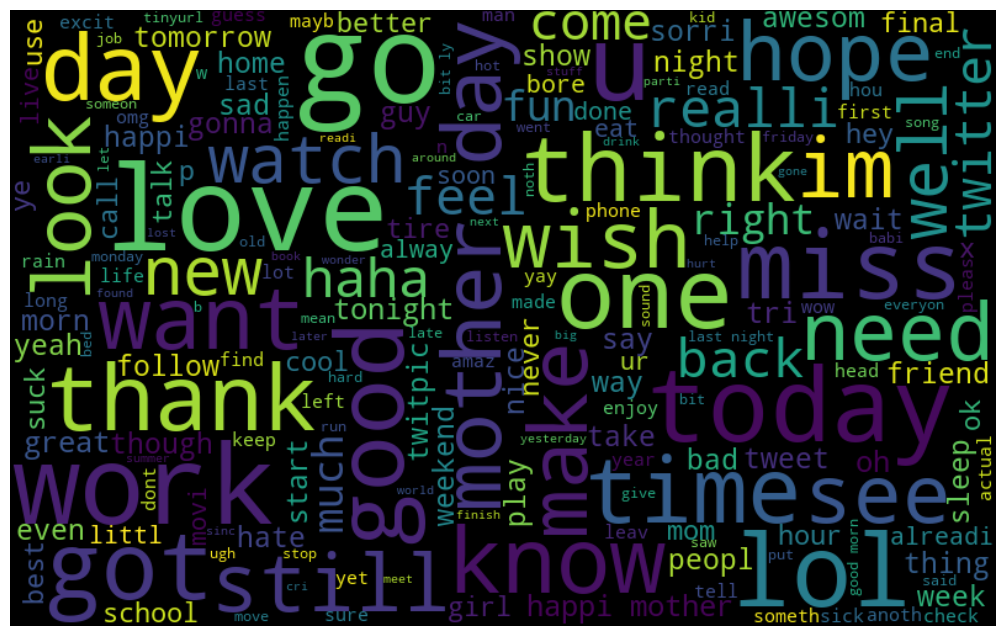

In [84]:
#Visualize the frequent words:
all_words = " ".join([i for i in df['processed_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#Plot:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

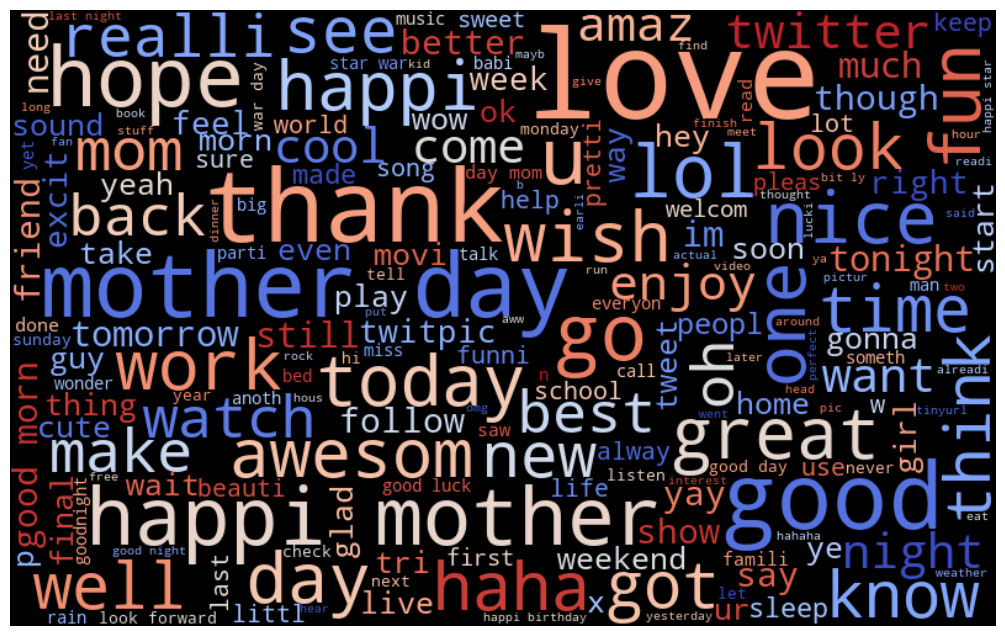

In [100]:
#Visualize the positive frequent words:
positive_words = " ".join([i for i in df['processed_text'][df['sentiment']==2]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,colormap='coolwarm',random_state=42,max_font_size=100).generate(positive_words)

#Plot:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

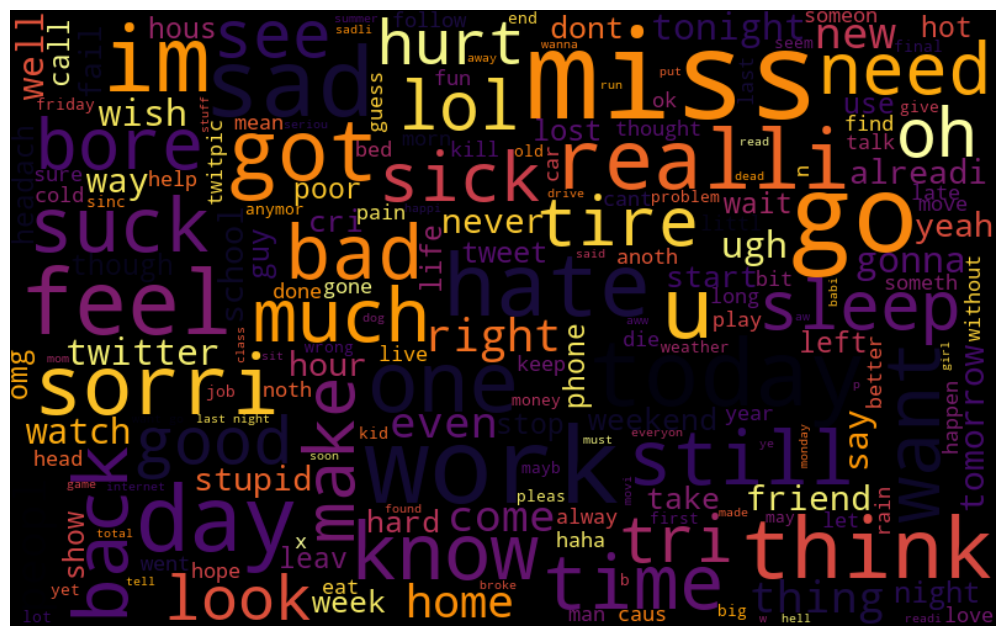

In [96]:
#Visualize the negative words:
negative_words = " ".join([i for i in df['processed_text'][df['sentiment']==0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,colormap='inferno',random_state=42,max_font_size=100).generate(negative_words)

#Plot:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

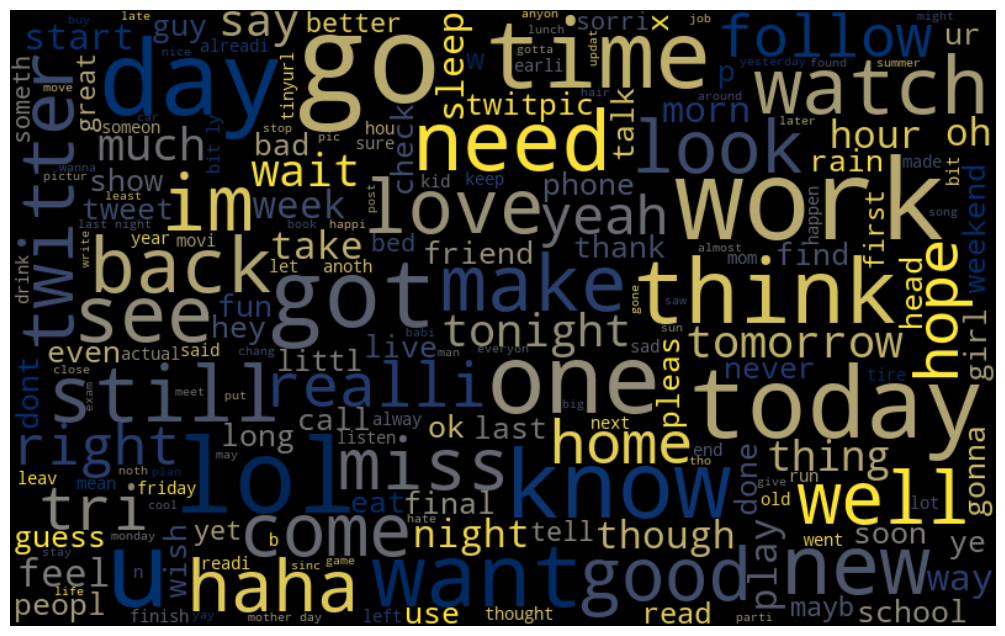

In [95]:
#Visualize the neutral frequent words:
neutral_words = " ".join([i for i in df['processed_text'][df['sentiment']==1]])


from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,colormap='cividis',random_state=42,max_font_size=100).generate(neutral_words)

#Plot:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()